# Session 2

By **Paul Rognon & Miquel Torrens i Dinarès**

*Barcelona School of Economics* –
*Data Science Center*

June 25th, 2023

---
## 7. Control flows

We cover `if` statements, and the basic loops: `for`, `while`, `repeat`.

### 7.1 `if`-statements

`if`-statements are used to run operations only if some condition is met. They start with the keyword `if` followed by the condition statement which must output a boolean. Then comes a block of operations to be run if the condition is met. Another block starting with keyword `else` can be added to define operations to be run if the condition is not met.

In [1]:
gender <- 'male'
age <- 20

# If-statement: use logical object as condition, then indent conditional actions
# Isolate condition in parenthesis, with pre- and post- single space
cat('* Person: ')
if (gender == 'female') {  # "if" clauses use "{" and "}"
  if (age > 18) {
    cat('Woman.\n')
  } else {
    cat('Girl.\n')
  }
} else if (gender == 'male') {  # "else if" tell what happens if there is another mutually exclusive condition
  if (age > 18) {
    cat('Man.\n')
  } else {
    cat('Boy.\n')
  }
} else {  # "else" tell what happens if previous conditions do not hold
  cat('Other gender.\n')
}

# Other ways to use if-statements
if (gender == 'male') cat('* Gender is male.\n')  # You can skip the clause if single-line (not recommended)
under.age <- ifelse(age < 18, 'Yes.', 'No.')  # Assign first element if condition holds, second element otherwise (single element operation)
cat('* Is the person under age:', under.age, '\n')

* Person: Man.
* Gender is male.
* Is the person under age: No. 


Note that `if`-conditions do not require an `else` statement, this is used when something in the code must happen either-or. If you only want a part of the code to run (without `else` contingency), you can just write `if (...) { ... }` and omit the rest.

### 7.2 `for`-loops

These are used when you want to repeatedly apply a set of operations, for example on the elements of an *iterable* object. A `for`-loop will replicate the computations for each element of the $n$ elements of the object and provide $n$ results.

In [2]:
n <- 5  # 5 elements
x <- rep(NA, n)  # Set an empty vector with n elements
for (i in 1:(2*n)) {  # For element "i" from 1 to 2*n, perform the following operations
  cat('Iteration:', i, '\n')
  result <- i^2 - 5
  if (result < 0) {
    next  # Next stops the run of operations in the block and make the loop move to the next iteration
  }
  x[i] <- sqrt(result)  # Set the i-th element with the squared root
  if (i > n) {
    break  # break stops the loop all together, no more operations are run if break is reached
  }
}

# Check the outcome
print(x)

Iteration: 1 
Iteration: 2 
Iteration: 3 
Iteration: 4 
Iteration: 5 
Iteration: 6 
[1]       NA       NA 2.000000 3.316625 4.472136 5.567764


The set of operations can be of any difficulty and length, this is just regular code: the only difference is that you repeat them for each element on the iterable object.

Keep in mind that a lot of `for`-loops can be converted to an `apply`-type operation, which in general is faster.

**Note:** there are two *reserved* words when looping: `next` and `break`. These are used to prevent loops from getting stuck or running into errors.

*   `next`: this will make a loop jump immediately to the next iteration, without running the remaining body of the loop from that point on (on the current iteration)
*   `break`: it will make the loop stop completely, i.e. you exit the loop and proceed with the rest of the code normally.



### 7.3 `while`-loops (and `repeat`)

These are used when you want to execute operations as long as a certain condition holds. It is structured like a `for`-loop, but mixed with an `if`-statement: at each iteration you are testing if a condition still holds. This condition is tested every time the body loop is executed, until it does not hold.

In [3]:
count <- 0
while (count < 10) {
  count <- count + 1
  cat('* Count:', count, '\n')
}

# "repeat" works in the same way but needs a "break" to stop
count <- 0
repeat {
  count <- count + 1
  cat('* Count:', count, '\n')
  if (count == 10) {
    break
  }
}

* Count: 1 
* Count: 2 
* Count: 3 
* Count: 4 
* Count: 5 
* Count: 6 
* Count: 7 
* Count: 8 
* Count: 9 
* Count: 10 
* Count: 1 
* Count: 2 
* Count: 3 
* Count: 4 
* Count: 5 
* Count: 6 
* Count: 7 
* Count: 8 
* Count: 9 
* Count: 10 


### 7.4 Parallelisation

Loops sometimes involve heavy computations and can be costly to evaluate in terms of computing time. Most programming languages natively use one single core in your computer to run a script, but most modern computers have multiple cores, and so in some situations it might be helpful to involve more cores in a computation to divide the *parallelisable* workload onto more than one core. This can sensibly cuts computation time.

By *parallelisable* we mean settings in which iterations are mutually independent from each other, this is not the case when the result of one iteration depends on the previous one.

We introduce a package to easily make `for`-loops parallel on multiple cores.

In [1]:
# You need some libraries for this
if (! require(doMC)) { install.packages('doMC') }  # Not installed by default
library(foreach)  # Parallel loop
library(doMC)

n <- 1e4  # 10^4 = 10,000 elements

# Regular for-loop
x1 <- rep(NA, n)  # Set an empty vector with n elements
for (i in 1:n) {  # For element "i" from 1:n, perform the following operations
  x1[i] <- i^2 - 5
}

# Parallelised loop
ncores <- 2
#ncores <- parallel::detectCores() - 1  # if you want to dedicate all but one core to this
doMC::registerDoMC(cores = ncores)  # This asks the computer to dedicate "ncores" to this computation
x2 <- foreach::foreach(i = 1:n, .errorhandling = 'pass') %dopar% {
  out <- i^2 - 5
  return(out)
}
# "foreach" returns a list by default: look into the argument ".combine" to change that
x2 <- unlist(x2)  # function "unlist()" is awesome: turn a list into a vector

# Check the outcome
print(head(x1))
print(head(x2))
identical(x1, x2)  # Same result


Loading required package: doMC

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



[1] -4 -1  4 11 20 31
[1] -4 -1  4 11 20 31


[1] TRUE

### 7.5 Error handling

Coding errors (a.k.a. *bugs*) happen. But it is much better if they can be easily caught and corrected, and that's why we have to write code that is as easy to *debug* as possible. Being able to spot where errors might happen fast and find a solution to suppress or by-pass them. Let us introduce some tools to deal with them.

In [3]:
# Say you have written a function like this
average <- function(x) {
  n <- length(x)
  avg <- sum(x) / n
  return(avg)
}

average(1:5)  # Ok

[1] 3

In [6]:
average(LETTERS[1:4])  # Error

ERROR: ignored

In [4]:
average(c(1:5, NA))  # Not an error, but not the output we intended to

[1] NA

Obviously, our `average()` function cannot deal with averaging letters or `NA`s, but our code did not foresee that, which causes a *bug* in the code. In this function the error is obvious, but that is not always the case, that's why the function `debug()` is helpful.

In [8]:
debug(average)
average(LETTERS[1:4])  # Error
undebug(average)  # Stop debugging

debugging in: average(LETTERS[1:4])
debug at <text>#2: {
    if (!is.numeric(x)) {
        stop("average cannot be computed because data is not numeric.")
    }
    if (any(is.na(x))) {
        warning("\"x\" contains \"NA\" values.")
        if (rm.na == TRUE) {
            x <- x[which(!is.na(x))]
        }
    }
    n <- length(x)
    avg <- sum(x)/n
    return(avg)
}
debug at <text>#4: if (!is.numeric(x)) {
    stop("average cannot be computed because data is not numeric.")
}
debug at <text>#5: stop("average cannot be computed because data is not numeric.")


ERROR: ignored

This function runs the code of what you're debugging line by line, and is interactive in RStudio and other IDEs (you can run function code line by line to inspect what is going on). In this case you spot what and where it goes wrong: `Error in sum(x): invalid 'type' (character) of argument`.

There are two ways to deal with this kind of errors: one is to fix it using control flows, the second one is to set-up a *controlled* error.

In [9]:
# Re-write a more solid function (add one argument)
average <- function(x, rm.na = TRUE) {  # rm.na = TRUE means "TRUE" is the default of this parameter unless specified otherwise
  # Deal with averaging non-numeric things: controlled error
  if (! is.numeric(x)) {
    stop('average cannot be computed because data is not numeric.')  # stops execution and executes an error action
  }

  # Deal with NAs: either solve by removing them, or controlled "warning"
  if (any(is.na(x))) {  # Function "any()": VERY USEFUL; tells if any element of x satisfies condition inside
    warning('"x" contains "NA" values.')  # "warning" gives a heads up of something potentially problematic while allowing the code to continue
    if (rm.na == TRUE) {
      x <- x[which(! is.na(x))]
    }
  }

  # Computation
  n <- length(x)
  avg <- sum(x) / n
  return(avg)
}

# Try again
average(1:5)  # Changes nothin when there is no problem

[1] 3

*Note:* similarly to `any(<logical_condition>)`, there is the function `all(<logical_condition>)`, testing that the conditions holds for all the elements (instead of *at least one*). These two functions are really helfpul to avoid potentially heavy loops.

In [10]:
average(LETTERS[1:5])  # Now the controlled error pops up (good)

ERROR: ignored

In [11]:
average(c(1:5, NA))  # Does the computation but it warns you that something is irregular

Warning message in average(c(1:5, NA)):
“"x" contains "NA" values.”


[1] 3

You can also use the `try()` function that will allow for the error to run but proceed with the posterior code regardless.

In [12]:
att1 <- try(average(LETTERS[1:5]))  # Put the commend inside the "try()" function
if (class(att1) == 'try-error') {  # if try() "fails", the object returned is of this class
  cat('* RESULT: The average could not be computed.\n')
} else {  # if it doesn't fail, then the result is as if "try()" had not been executed
  cat('* RESULT: The average is:', att1, '.\n')
}

att2 <- try(average(1:5))
if (class(att2) == 'try-error') {
  cat('* RESULT: The average could not be computed.\n')
} else {
  cat('* RESULT: The average is:', att2, '.\n')
}

# try() is verbose by default but it can be made silent if you don't want the error to be printed (check arguments)

Error in average(LETTERS[1:5]) : 
  average cannot be computed because data is not numeric.
* RESULT: The average could not be computed.
* RESULT: The average is: 3 .


---
## 8. Stats and math

### 8.1 Basic functions

One of `R`'s strengths is large amount of statistical methods implemented, either natively or within packages. Here we provide the very basics to get you started, and introducte some of the functions that are bread and butter for statistical and mathematical programmers.

Basic mathematical functions (operators aside)

In [14]:
abs(-3)
sign(c(-4, 0, 7))
exp(3)
log(100); log10(100); log2(64)  # Note you can separate commands with ";"
sqrt(25)
sin(1); cos(1); tan(1)
choose(5, 3)  # Combinatorial number (n choose k)
factorial(5)  # Factorial number: x!
combn(1:4, 2)  # Provides all combinations of "2" elements in the set 1:4

[1] 3

[1] -1  0  1

[1] 20.08554

[1] 4.60517

[1] 2

[1] 6

[1] 5

[1] 0.841471

[1] 0.5403023

[1] 1.557408

[1] 10

[1] 120

1,1,1,2,2,3
2,3,4,3,4,4


Basic statistical summaries

In [15]:
x <- seq(-3, 3, 1)
y <- seq(-6, 6, 2)
max(x)  # Cumulative maximum: cummax(x)
min(x)  # cummin(x)
sum(x)  # cumsum(x)
prod(x)  # cumprod(x)
diff(x)  # With respect to previous value in the vector
table(x)  # Abs. Frequencies
table(x, y)  # Contingency table
quantile(1:200, probs = c(0.1, 0.5, 0.9))
range(x)
rank(x)

[1] 3

[1] -3

[1] 0

[1] 0

[1] 1 1 1 1 1 1

x
-3 -2 -1  0  1  2  3 
 1  1  1  1  1  1  1 

    y
x    -6 -4 -2 0 2 4 6
  -3  1  0  0 0 0 0 0
  -2  0  1  0 0 0 0 0
  -1  0  0  1 0 0 0 0
  0   0  0  0 1 0 0 0
  1   0  0  0 0 1 0 0
  2   0  0  0 0 0 1 0
  3   0  0  0 0 0 0 1

10%   50%   90% 
 20.9 100.5 180.1

[1] -3  3

[1] 1 2 3 4 5 6 7

More descriptive statistics

In [16]:
mean(x)
median(x)
cor(x, y)
cov(x, y)
sd(x)
var(x)

[1] 0

[1] 0

[1] 1

[1] 9.333333

[1] 2.160247

[1] 4.666667

Here are some useful matrix algebra functions (to use on `matrix`-type objects):

*   `t` (matrix transpose), `diag` (matrix diagonal)
*   `crossprod`, `tcrossprod`, `outer` (cross-, transpose-cross- and outer-products)
*   `eigen`, `qr`, `svd` (eigen, QR and SVD decompositions)
*   `rcond` (condition number)
*   `solve` (matrix inverse, or systems of equations)

### 8.2 Statistical distributions (characterisation and simulation)

You can find PDFs and CDFs for a wide variety of parametric distributions, as well as easily get random samples from them. Here are some basics to simulate things in `R`:

In [17]:
set.seed(666)
sample(1:10, 1)  # Most basic simulation function: sample 1 element out of 1:10
sample(1:5, 3, replace = TRUE)  # Replace TRUE puts the sampled values back in the pool
sample(1:5, 3, replace = FALSE)  # Once a value is drawn, it cannot be drawn again

[1] 5

[1] 1 4 1

[1] 2 3 1

There are four key letters to deal with a given available parametric distribution:

*   `d`: provides the *density* (PDF) of the distribution at the supplied value
*   `p`: provides the *cumulative probability* (CDF) up to the supplied value
*   `q`: provides the *quantile* of the distribution for a given probability
*   `r`: provides a *random* sample of the supplied size for the specified distribution

We illustrate this with the Normal distribution:

In [18]:
x <- 1  # Any value on the real line
a <- 0.6  # Any value between 0 and 1
n <- 1e3  # Any integer (note the scientific notation: 10^3 = 1,000)

dnorm(x, mean = 0, sd = 1)  # PDF of the Normal at x = 1 (density)
pnorm(x, mean = 0, sd = 1)  # CDF of the Normal: returns P(X < 1)
qnorm(a, mean = 0, sd = 1)  # Quantile: returns x such that P(X < x) = 0.6
pnorm(x, mean = 0, sd = 1, lower.tail = FALSE)  # Upper-tail CDF of the Normal: returns P(X > 1)
qnorm(a, mean = 0, sd = 1, lower.tail = FALSE)  # Quantile, but opposite tail P(X > x) = 0.6, i.e. P(X < x) = 1 - 0.6
head(rnorm(n, mean = 0, sd = 1))  # Here we ask for 1,000 random draws of a N(0, 1): note we require a different parameter!

[1] 0.2419707

[1] 0.8413447

[1] 0.2533471

[1] 0.1586553

[1] -0.2533471

[1] -0.80251957 -1.79224083 -0.04203245  2.15004262 -1.77023084  0.86465359


Every distribution will have its set of parameters: the Normal here has `mean` and `sd`, which you can specify to whatever values you need, and if not specificied are taken to be `mean = 0`, and `sd = 1` (the standard Normal). But for example the `chisq` ($χ_{\nu}^{2}$) requires the parameter `df` (degrees of freedom, $\nu$), with no default, or the binomial needs to be supplied `size` ($n$) and `prob` ($p$).

Here I list the most common distributions available and their command name: `beta`, `binom`, `cauchy`, `chisq`, `exp`, `f`, `gamma`, `geom`, `hyper`, `lnorm` (log-normal), `logis`, `multinom`, `nbinom` (negative binomial), `norm`, `pois`, `t`, `unif`, `weibull`, `wilcox`, `birthday`, `tukey`. There are also functions to simulate from multivariate distributions, but they typically come from external packages (for example, the Normal distribution is in the CRAN package `mvnorm`). Look them up!

There are also various statistical tests that are readily available, even a summary is beyond the scope of this intro course. This set of tests is close to uncountable, so as a basic rule, if you look for "R [name of the test]" in your favourite search engine, you will most likely find what command you need quickly, for example you can do an ANOVA test with the command `anova`.

### 8.3 Statistical models

As a final note, `R` is equipped with numerous statistical models, here we show how to run a linear regression.

In [53]:
# Draw some data
set.seed(666)
n <- 100  # rows
p <- 50  # columns
X <- matrix(rnorm(n * p), nrow = n, ncol = p)  # Regression matrix
b <- c(1, 1, 1/2, 1/2, rep(0, p - 4))  # Regression coefficients
y <- X %*% b + rnorm(n)  # Model: y = X * b + epsilon, epsilon is N(0, 1)
df <- cbind.data.frame(y, X)  # Put all the data into one data.frame
colnames(df) <- c('y', paste('var', 1:p, sep = ''))  # Column names

# Linear regression
model <- lm(y ~ var1 + var2, data = df)  # "lm" is linear model: you declare a "formula" with the "~" symbol,
                                         # and add variables (names) with "+"
model <- lm(y ~ ., data = df)  # The dot tells it to add all variables

Some useful diagnostics

In [54]:
# These following functions are generic: they work for most models in R!
summary(model)  # This gives you the classical table with the results
head(coef(model))  # Estimated coefficients (beta hat)
head(confint(model))  # Confidence intervals for the coefficients (you can change significance)
head(fitted(model))  # Fitted values - regression line
head(resid(model))  # Model residuals


Call:
lm(formula = y ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85209 -0.44267  0.03548  0.45171  1.60441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0972054  0.1293670  -0.751  0.45601    
var1         0.8675616  0.1221973   7.100 4.65e-09 ***
var2         1.0101160  0.1229673   8.215 8.99e-11 ***
var3         0.7222472  0.1373306   5.259 3.16e-06 ***
var4         0.5443718  0.1368960   3.977  0.00023 ***
var5        -0.1920666  0.1507418  -1.274  0.20862    
var6        -0.1268034  0.1636196  -0.775  0.44207    
var7        -0.0859963  0.1222497  -0.703  0.48511    
var8         0.0671576  0.1630104   0.412  0.68215    
var9        -0.1211380  0.1301038  -0.931  0.35637    
var10       -0.0020973  0.1297702  -0.016  0.98717    
var11        0.1749164  0.1438082   1.216  0.22969    
var12       -0.0526155  0.1462959  -0.360  0.72065    
var13        0.2009111  0.1343164   1.496  0.14112    
var14       -0.273

(Intercept)        var1        var2        var3        var4        var5 
-0.09720536  0.86756164  1.01011598  0.72224716  0.54437178 -0.19206660

,2.5 %,97.5 %
(Intercept),-0.3571781,0.1627674
var1,0.6219970,1.1131262
var2,0.7630040,1.2572280
var3,0.4462710,0.9982233
var4,0.2692690,0.8194746
var5,-0.4949935,0.1108603


1           2           3           4           5           6 
 0.42735670  0.98253188 -0.08173233  4.92210505 -3.13904850  0.32190933

1           2           3           4           5           6 
-0.50505047  0.39327450  0.17637673 -0.96308610  0.08577684  0.25467706

Prediction

In [21]:
# We create five new observations and use the estimated model to predict
new.df <- matrix(rnorm(5 * p), nrow = 5, ncol = p) # "predict" function requires a data.frame
colnames(new.df) <- colnames(df)[-1]  # Needs to be in the same format
predict(model, newdata = as.data.frame(new.df))  # Prediction for a new observation with covariates rnorm(n)

1         2         3         4         5 
 1.798792 -2.402820 -1.889108 -1.281219  1.456660

 If your outcome is binary, for example, use `glm(..., link = 'binomial')` instead as the modelling function (the rest stays the same). Many models are natively built into `R`, but many others are not. This is where packages kick in: if you're trying to use a method that is not built-in, it is likely that someone has written a package implementing it.

---
## 9. String manipulation

Sometimes instead of numbers you may need to work with text data. We present some functions to manipulate text data (strings) easily.

Length, splitting and pasting

In [22]:
raw.text <- 'abcd dcba efg 1xyz mnop0'  # Say you have some raw text

# Number of characters in a string
nchar(raw.text)

# Splitting
data <- strsplit(raw.text, ' ')  # You can split it into several elements (cut by " ")
data <- unlist(data)  # "strsplit" returns a list
print(data)

# Paste elements
paste(data[1], data[2], sep = '_')  # Paste two elements with separator
paste(data, collapse = '+')  # Paste all elements with collapsing character

[1] 24

[1] "abcd"  "dcba"  "efg"   "1xyz"  "mnop0"


[1] "abcd_dcba"

[1] "abcd+dcba+efg+1xyz+mnop0"

Some typography

In [55]:
# Set of letters
head(LETTERS)  # Uppercase
head(letters)  # Lowercase
LETTERS[1:4]  # A, B, C, D (can be subsetted like any other object)
"\u00b5"  # Some non-roman characters are encoded: this prints the greek letter "mu" (unicode)

# Transform to upper- or lower-case
tolower('CAPS ARE YELLING IN WRITING')
toupper('but sometimes it is necessary')

# Suppress white spaces before the first non white space character and after the last non white space character
trimws('   this string is too long.   ')

[1] "A" "B" "C" "D" "E" "F"

[1] "a" "b" "c" "d" "e" "f"

[1] "A" "B" "C" "D"

[1] "µ"

[1] "caps are yelling in writing"

[1] "BUT SOMETIMES IT IS NECESSARY"

[1] "this string is too long."

In [24]:
# Identify elements with certain patterns
grep('bc', data)  # Returns indices of elements containing "bc"
grepl('a', data)  # Returns logical instead of indices
agrep('bco', data)  # "Approx." grep, grep with partial matching, looks for elements "close" to matching pattern ('bco' is nowhere but I get 1)

# Subtract characters in a specific position
substr(data, 1, 2)  # Get characters from 1 to 2 (of each element)

# You can also replace parts of the string with something else
gsub('ab', 'AB', data[1])  # Careful with order of arguments

# Line change
for (i in 1:5) cat(i, '\n')  # Print "i" and write next in a new line

[1] 1

[1]  TRUE  TRUE FALSE FALSE FALSE

[1] 1

[1] "ab" "dc" "ef" "1x" "mn"

[1] "ABcd"

1 
2 
3 
4 
5 


With respect to text display on the console, there are three (plus bonus) common ways of printing:

*   `print()`: works with anything but output is less "pretty"/readable
*   `cat()`: easier to manipulate (works like `paste()`) but only works on atomic types (logical, integer, real, character...) and names
*   `message()`: mostly used inside functions to display text on events occuring in your code
*   `sink()`: this allows you to write output on an external file. Basically, write `sink([file_name].txt)`, and then whatever is printed after that (with `print`/`cat`) will be written on `[file_name].txt`. To stop the connection, write `sink()` again (no arguments) and the display is back to the command line.

In [56]:
sink('testing_sink.txt')
print('testing the sink function!')
sink()
# Due to specificities in printing in Colab, the output file is blank. It works perfectly in RStudio

[1] "testing the sink function!"


Finally, the operations on text above may be applied to strings that are not "exact", i.e. imagine that instead of finding the character "1", you want to find "a number", or "that starts with A". Then you use *regular expressions*. Luckily, the rules in `R` for regular expressions are the standard for any language.

In [26]:
data <- c('abcd', 'dcba', 'efg', '1xyz', 'mnop0')

# Find the strings that...
grep('^a', data)  # start with "a"
grep('a$', data)  # end with "a"
grep('[am]', data)  # have any of the characters "a", "m"
grep('[ab|fg]', data)  # have either the characters "ab" or "fg"
grep('[a-c]', data)  # have a character in the range "a"-"c"
grep('[:digit:]', data)  # have a digit
grep('a[?=b]', data)  # have "a" followed by "b"
# ...

[1] 1

[1] 2

[1] 1 2 5

[1] 1 2 3

[1] 1 2

[1] 1 2 3

[1] 1

Regular expressions are a **very** rich language, you can virtually find one for anything you can think of, and they are generic. Here is a link to a cheat sheet that contains a very complete summary of the expressions you can apply:
*   https://evoldyn.gitlab.io/evomics-2018/ref-sheets/R_strings.pdf


Finally, it is worth mentioning that simple text in `R` revolves around standard roman letters, anything else needs to be *encoded* carefully: letters with accents (`è`, `ã`,  `ö`, `ê`, ...) and other special characters. I don't recommend using them unless strictly necessary. For example, a natural text in Catalan contains certain characters (accents, or letters like `ç`), and may need to be converted prior to everything, else it may cause errors. There is a very helpful function that translates encodings from one to the other.



In [27]:
txt <- "El pingüí està glaçat però a ell li fa il·lusió passar fred."
Encoding(txt)  # UTF-8

# Strip down to simple roman characters
new.txt <- iconv(txt, from = 'UTF-8', to = 'ASCII//TRANSLIT')
print(txt)
print(new.txt)  # Converts to full-roman simple characters

[1] "UTF-8"

[1] "El pingüí està glaçat però a ell li fa il·lusió passar fred."
[1] "El pingui esta glacat pero a ell li fa il.lusio passar fred."


For more advanced things, a nice package to deal with strings in `R` is `stringr`, check it out.

---
## 10. Basic data visualization

Base `R` offers an flexible framework to produce high quality plots, which sometimes requires a bit of practice. Let us cover some basic static plots, and the essential tools to build some of your own.

Some basic built-in charts:

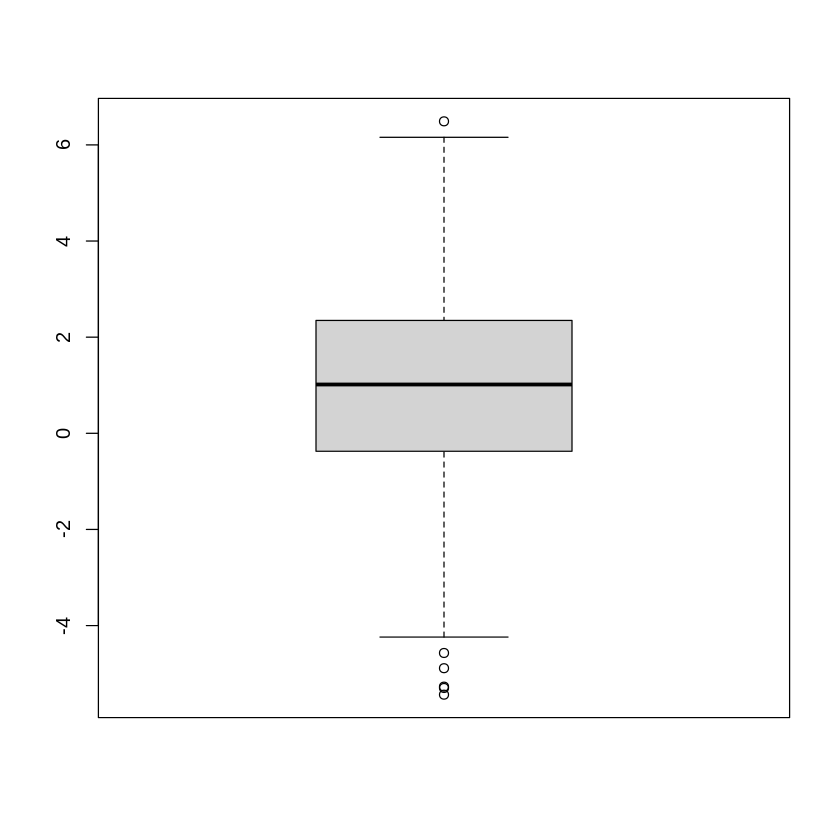

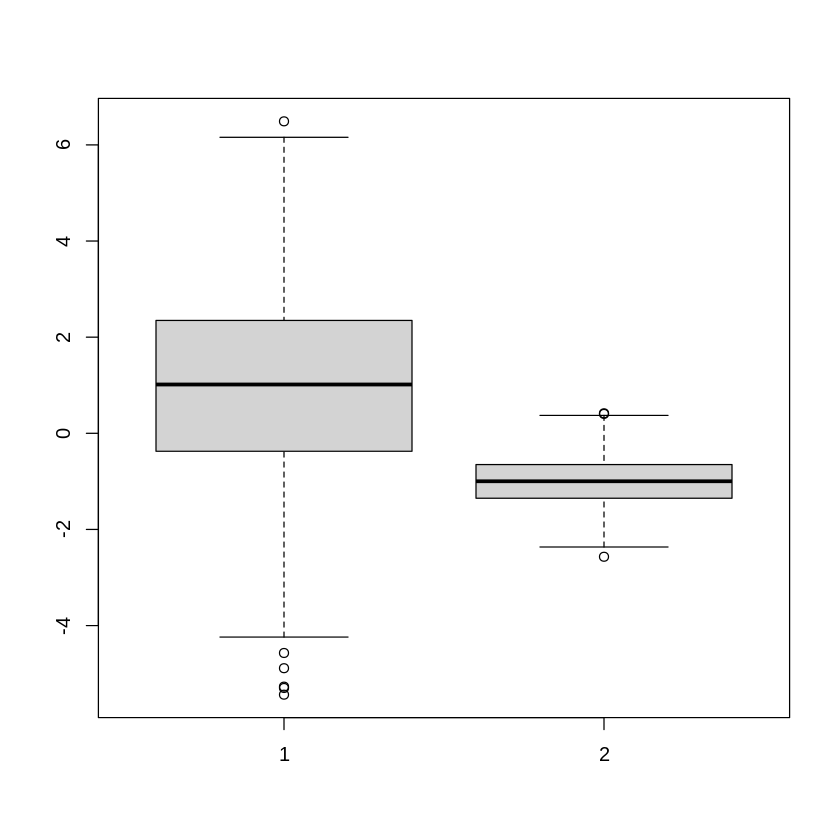

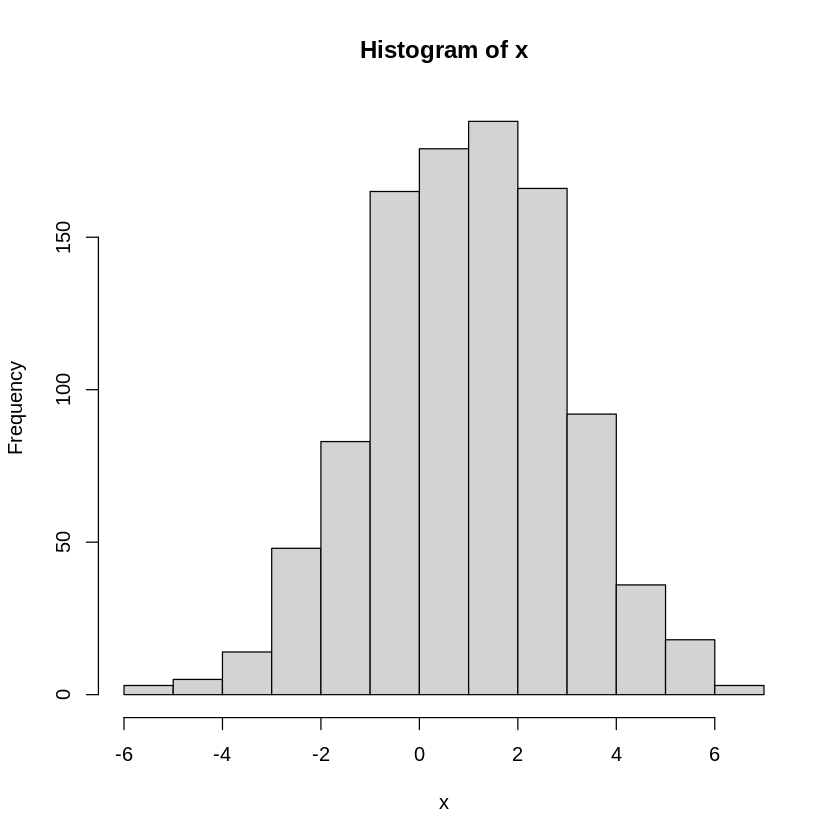

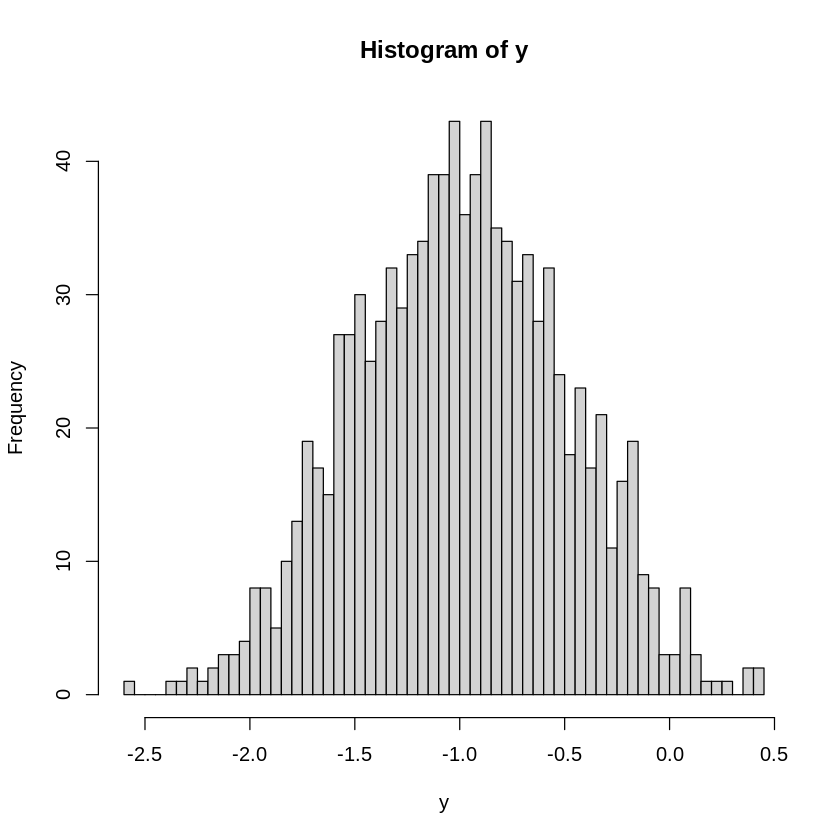

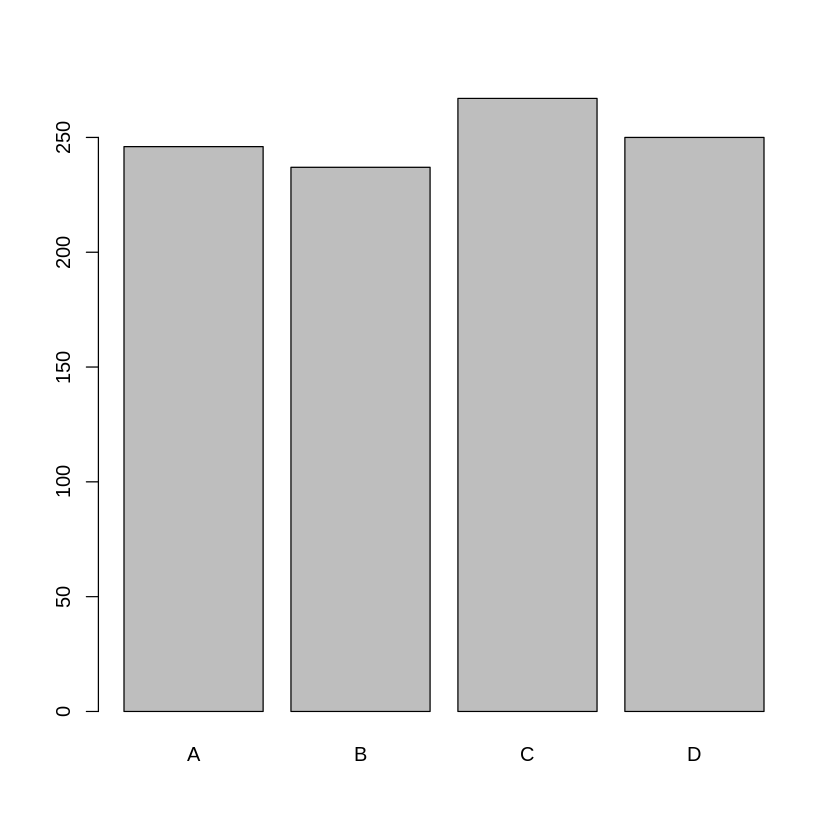

In [28]:
set.seed(666)
x <- rnorm(1e3, mean = 1, sd = 2)
y <- rnorm(1e3, mean = -1, sd = 0.5)
z <- sample(LETTERS[1:4], 1e3, replace = TRUE)

# Boxplot (look at the set of arguments)
boxplot(x)
boxplot(x, y)  # Joint plot

# Histogram
hist(x)
hist(y, breaks = 50)  # Number of columns

# Barplot (categorical variable)
barplot(table(z))

However, the generic function to generate static charts in `R` is `plot()`. The functions we just used have `plot()` underlying their structure, and use the same parameters. This function allows for a large number of arguments that allow to fully customize it to what you might need.

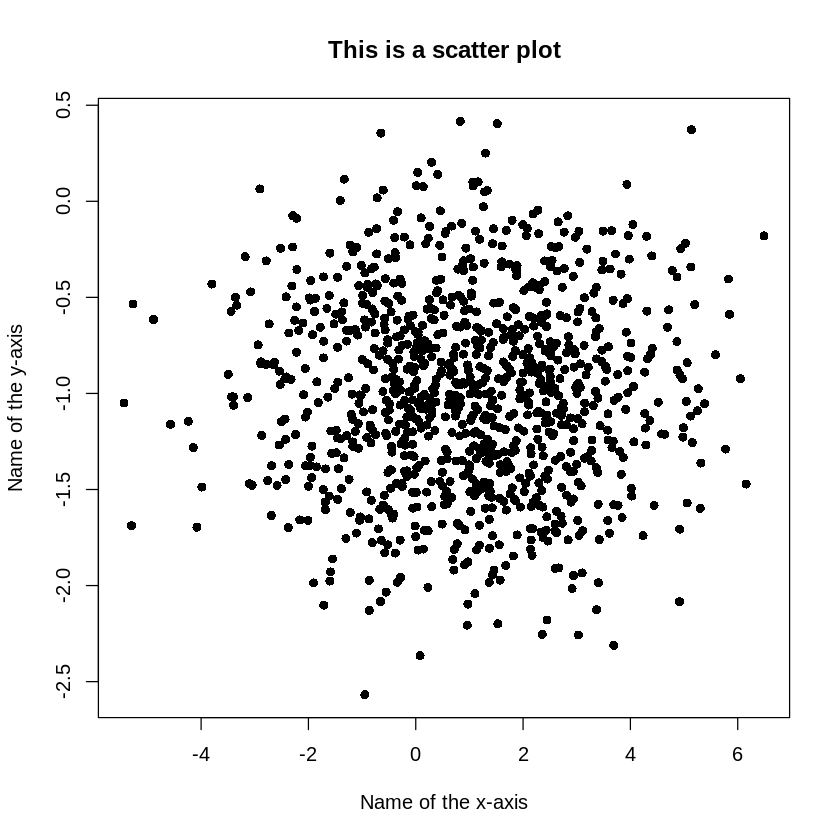

In [29]:
plot(x, y, col = 'black', pch = 16,  # "pch" is a parameter determining the shape of the dot
  xlab = 'Name of the x-axis',
  ylab = 'Name of the y-axis',
  main = 'This is a scatter plot')

One key-parameter is `type`, which determines the nature of the plot. By default this is of `type = 'p'`, i.e. of points. Set it to `type = 'l'` for a line plot, or, for example, or to `type = 'n'` to just plot the plot frame.

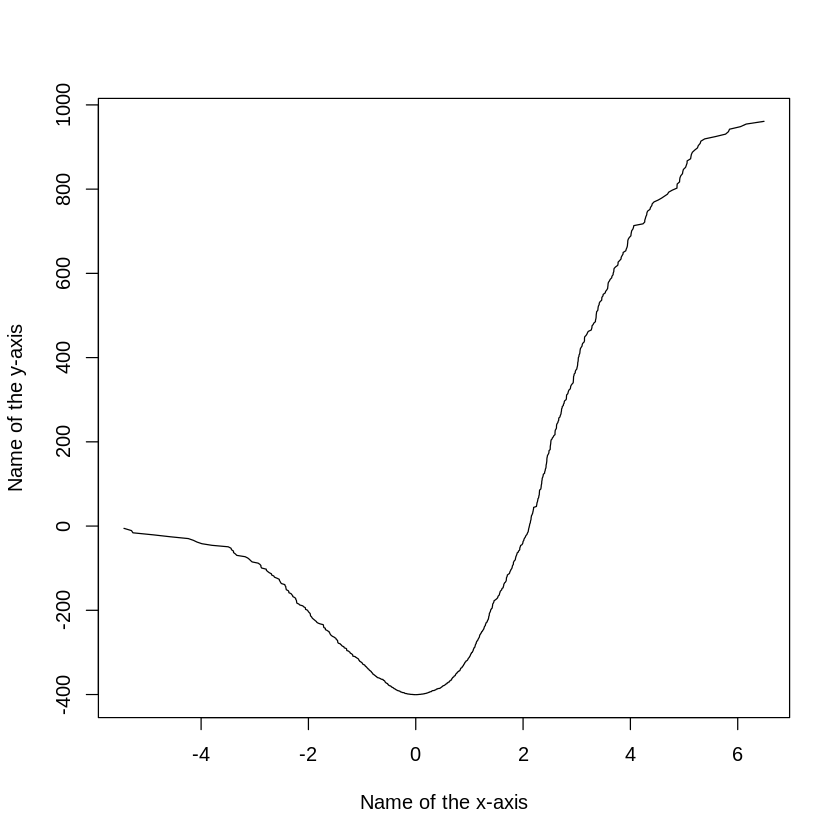

In [30]:
# Line plots
plot(sort(x), cumsum(sort(x)), type = 'l',
  xlab = 'Name of the x-axis',
  ylab = 'Name of the y-axis')

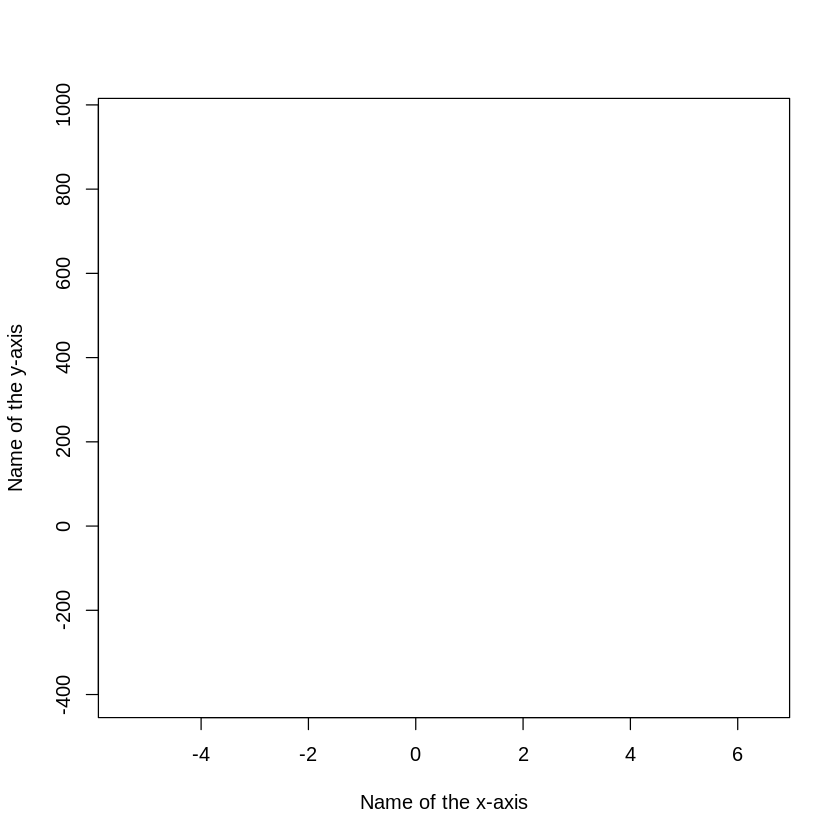

In [57]:
# Line plots
plot(sort(x), cumsum(sort(x)), type = 'n',
  xlab = 'Name of the x-axis',
  ylab = 'Name of the y-axis')

Also note the `col` parameter, which is used to specify the colour. This parameter is quite flexible, many generic colours are available as text (`black`, `blue`, `red`, etc.), but you can also give it integers (default colours), RGB codes and hexadecimal codes.

Other very relevant parameters:

*  `xlim`: two-position vector to establish limits of the $x$-axis
*  `ylim`: same for the $y$-axis
*  `xaxt`: boolean to have values on the $x$-axis or not
*  `yaxt`: boolean to have values on the $y$-axis or not
*  `asp`: sets the aspect-ratio of the plot
*  `frame.plot`: draw a frame on the edges of the plot
*  `log`: to use a logarithmic scale on either axis

There are other more general graphical parameters that you can specify as well, such as `pch`, we highlight the following:

*   `bg`: background colours of the plot symbols
*   `cex`: size of the plot symbols (by default is 1)
*   `lty` (for line plots): type of line (solid, dashed, points...)
*   `lwd` (for line plots): width of the lines

The `plot()` function is the backbone to most static diagrams in `R`. We introduce a few more functions to complement it:

In [31]:
# Run again a simple linear model
set.seed(666)
n <- 100  # rows
X <- matrix(rnorm(n), nrow = n, ncol = 1)  # Regression matrix
b <- 1  # Regression coefficient
y <- X %*% b + rnorm(n)  # Model: y = X * b + epsilon, epsilon is N(0, 1)
df <- cbind.data.frame(y, X)  # Put all the data into one data.frame
colnames(df) <- c('y', 'x')  # Column names

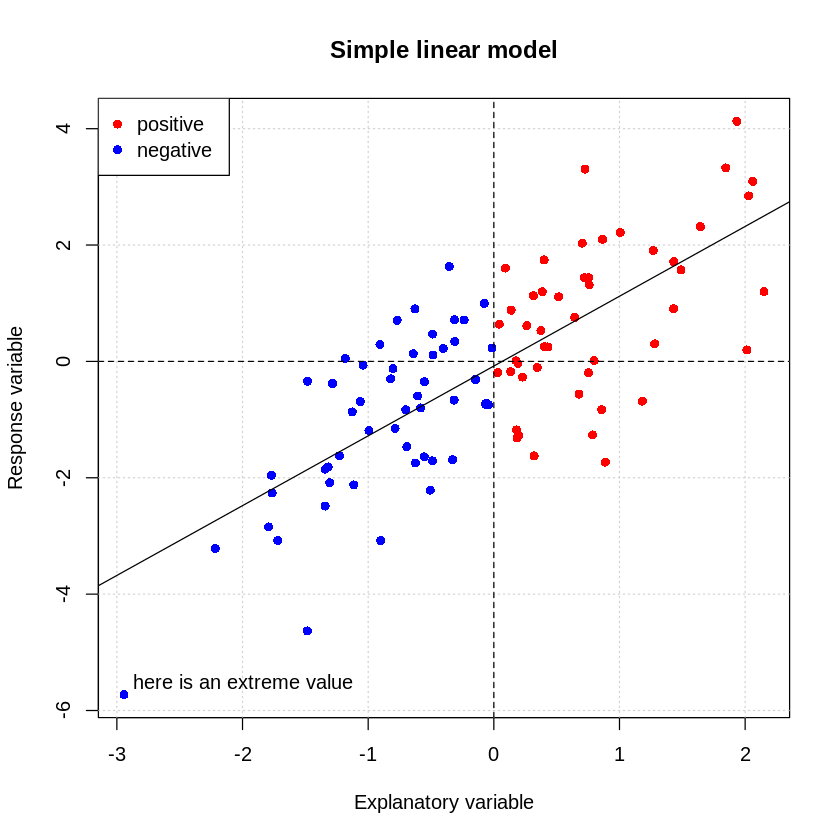

In [32]:
# We will plot the estimated equation
plot(df[, 'x'], df[, 'y'],
  xlab = 'Explanatory variable',
  ylab = 'Response variable',
  main = 'Simple linear model',
  type = 'n')  # Create only the framework

# Filling the plot
grid()  # Adds a fine grid
neg.x <- which(df[, 'x'] < 0)  # Observations that have negative "x"
pos.x <- which(df[, 'x'] > 0)  # Observations that have positive "x"
points(df[neg.x, 'x'], df[neg.x, 'y'], col = 'blue', pch = 16)  # Blue points for negative x's
points(df[pos.x, 'x'], df[pos.x, 'y'], col = 'red', pch = 16)  # Red points for negative x's
abline(lm(y ~ x, data = df))  # Add line with regression model
abline(v = 0, lty = 2)  # Add a line "vertical" at 0
abline(h = 0, lty = 2)  # Add a line "horizontal" at 0
text(-2, -5.5, 'here is an extreme value')  # Add text to the plot at given coordinates

# Legend
legend('topleft', legend = c('positive', 'negative'), col = c('red', 'blue'), pch = 16)

# The function "lines()" lets draw custom lines:
# Try replacing the FALSE with a TRUE to add an orange line to the plot
if (FALSE) {
  values <- seq(-3, 3, 0.01)
  lines(values, sin(values), col = 'orange', lwd = 2)
}

Finally, note that you can make multiple plots on the same frame, and that you can store them out as `.png`, `.jpeg`, or `.pdf` (recommended). Here is how:

In [58]:
set.seed(666)
x <- rnorm(1e3, mean = 1, sd = 2)
y <- rnorm(1e3, mean = -1, sd = 0.5)

# Define the external file as at <file_path.ext>
png('example.png',  height = 480, width=600)  # To save as .png
#jpeg(<file_path.jpeg>, height = 4, width = 6)  # To save as .jpeg
#pdf(<file_path.pdf>, height = 4, width = 6)  # To save as .pdf
par(mfrow = c(1, 2))  # 1 row and two columns of plots
plot(density(x), xlim = c(-6, 6), col = 'blue')  # This plots a kernel density estimate
plot(density(y), xlim = c(-6, 6), col = 'red')
dev.off()  # If you save it externally, run this at the end to close connection!

png 
  2

---
## 11. Popular packages

Out of all the packages available in `R`, some became very popular and gold standards. We highlight here a few of the most popular ones.

The [`tidyverse`](https://www.tidyverse.org/) suite developped by the organization behind RStudio is particularly popular. They are very powerful and very well documented packages. Some of the packages are natively embedded in RStudio. Each package has a "cheatsheet" that gives an overview of all the possibilites of the package.


### 11.1 `dplyr`

This is a `tidyverse` package that is designed to clean, process, and manipulate data in a faster and more compact way than the canonical methods we have shown before. In short, it offers a fast alternative to manage tabular data (`data.frame`) with simpler *grammar* than base `R`. We highlight the main operations that can be done with `dplyr`, and offer the corresponding base method to compare.

In [59]:
# Load the package
library(dplyr)

# Dataset: air pollution and temperature data for the city of Chicago (IL)
link <- "https://raw.githubusercontent.com/barcelonagse-datascience/academic_files/master/data/chicago"
chicago <- readRDS(url(link, "rb"))  # url() declares the link as an active file

# General info
dim(chicago)  # 6940x8
class(chicago)  # data.frame
head(chicago)

[1] 6940    8

[1] "data.frame"

,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
2,chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
3,chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
4,chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
5,chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
6,chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


`dplyr::select` lets you select colnames with easy to write logical conditions

In [35]:
# select(): keep sets of columns
data <- dplyr::select(chicago, city:dptp)  # Select variables from 'city' to 'dptp'
data <- dplyr::select(chicago, -(city:dptp))  # All but this range
data <- dplyr::select(chicago, ends_with('2'))  # That the column name ends in '2'
data <- dplyr::select(chicago, starts_with('d'))  # That it starts with 'd'

# Same thing with base R...
if (FALSE) {
  data <- chicago[, colnames(chicago) %in% colnames(chicago)[1:3]]
  data <- chicago[, ! colnames(chicago) %in% colnames(chicago)[1:3]]  # NOT in
  data <- chicago[, grep('2$', colnames(chicago))]
  data <- chicago[, grep('^d', colnames(chicago))]
}

`dplyr::filter` lets you filter rows with easy to write logical conditions

In [36]:
# filter(): keep sets of observations
chic.f <- dplyr::filter(chicago, (pm25tmean2 > 30) & (tmpd > 80)) # Select all rows where pm25tmean2 > 30 & tmpd > 80

summary(chic.f[, 'pm25tmean2'])
summary(chic.f[, 'tmpd'])

# Same thing with base R...
if (FALSE) {
  chic.f <- chicago[which(chicago[, 'pm25tmean2'] > 30 & chicago[, 'tmpd'] > 80), ]
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.20   32.70   33.90   36.68   38.85   51.54 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     81      82      82      83      84      86 

`dplyr::arrange` lets you sort a data frame by the values of one or several columns easily

In [37]:
# arrange(): sort the observations by some criterion
chicago <- dplyr::arrange(chicago, date)  # by date (ascending)
chicago <- dplyr::arrange(chicago, desc(date))  # descending

# Same thing with base R...
if (FALSE) {
  chicago <- chicago[order(chicago[, 'date'], decreasing = FALSE), ]
  chicago <- chicago[order(chicago[, 'date'], decreasing = TRUE), ]
}

`dplyr::rename` lets you rename one or several columns easily

In [61]:
# rename(): change column names
chicago <- dplyr::rename(chicago, dewpoint = dptp, pm25 = pm25tmean2)  # Some names are obscure

# Same thing with base R...
if (FALSE) {
  colnames(chicago)[colnames(chicago) == 'dptp'] <- 'dewpoint'
  colnames(chicago)[colnames(chicago) == 'pm25'] <- 'pm25tmean2'
}

`dplyr::mutate` lets you create new colums by transforming existing columns easily

In [39]:
# mutate(): compute transformations of variables
chicago <- dplyr::mutate(chicago, pm25detrend = pm25 - mean(pm25, na.rm = TRUE))

# Same thing with base R...
# (check also base function: with())
if (FALSE) {
  chicago[, 'pm25detrend'] <- chicago[, 'pm25'] - mean(chicago[, 'pm25'], na.rm = TRUE)
  #chicago[, 'pm25detrend'] <- scale(chicago[, 'pm25'], center = TRUE, scale = FALSE)  # Even simpler
}

`dplyr::group_by` lets you group your rows by some criterion and operate on the groups. It is particularly use with `dplyr::summarize()` that performs reduce operations / gets a summary value of your choice.

In [62]:
# For example, we might want to know what the average annual level of PM2.5 is.
chicago_new <- mutate(chicago, year = as.POSIXlt(date)$year + 1900 )

# group_by() and summarize(): generate summary stats based on strata
years <- dplyr::group_by(chicago_new, year)
summ <- dplyr::summarize(years, yearlypm25 = mean(pm25, na.rm=TRUE),
  o3 = max(o3tmean2, na.rm = TRUE), no2 = median(no2tmean2, na.rm = TRUE))
tail(summ)

# Same thing with base R...
if (TRUE) {
  summ2 <- cbind(
    tapply(chicago_new[, 'pm25'], chicago_new[, 'year'], mean, na.rm = TRUE),
    tapply(chicago_new[, 'o3tmean2'], chicago_new[, 'year'], max, na.rm = TRUE),
    tapply(chicago_new[, 'no2tmean2'], chicago_new[, 'year'], median, na.rm = TRUE))
  tail(summ2)
}

year,yearlypm25,o3,no2
<dbl>,<dbl>,<dbl>,<dbl>
2000,16.93806,55.76103,23.46082
2001,16.92632,51.81984,25.06522
2002,15.27335,54.88043,22.73750
2003,15.23183,56.16608,24.62500
2004,14.62864,44.48240,23.39130
2005,16.18556,58.84126,22.62387


2000,16.93806,55.76103,23.46082
2001,16.92632,51.81984,25.06522
2002,15.27335,54.88043,22.73750
2003,15.23183,56.16608,24.62500
2004,14.62864,44.48240,23.39130
2005,16.18556,58.84126,22.62387


You can also do the usual `join` operations using

*   `inner_join(df1, df2, by = c('<column_name(s)>'))`
*   `outer_join(df1, df2, by = c('<column_name(s)>'))`
*   `left_join(df1, df2, by = c('<column_name(s)>'))`
*   `right_join(df1, df2, by = c('<column_name(s)>'))`

Natively this can be done with the `merge()` function we introduced before.

Finally a key feature of `dplyr` is the pipeline operator, `%>%`. This operator lets you perform multiple multiple `dplyr` operations in a single statement.

In [41]:
# Repeat the previous operation by month (with the pipeline)
# Structure (L-to-R): result <- first(x) %>% second %>% third
summ <- mutate(chicago, month = as.POSIXlt(date)$mon + 1) %>%
  group_by(month) %>%
  summarize(pm25_max = max(pm25, na.rm = TRUE),
    o3_max = max(o3tmean2, na.rm = TRUE),
    no2_max = max(no2tmean2, na.rm = TRUE))

summ

month,pm25_max,o3_max,no2_max
<dbl>,<dbl>,<dbl>,<dbl>
1,49.47143,28.22222,52.44697
2,61.50000,37.37500,57.56439
3,47.73750,39.05000,53.89485
4,46.70000,47.94907,57.52542
5,56.50000,52.75000,51.28535
6,51.53750,66.58750,52.20833
7,41.40000,59.54167,62.47998
8,44.48750,53.96701,55.90522
9,56.50000,57.48864,53.13333


### 11.2 `data.table`

This is an alternative library to `dplyr`, and its main advantage is speed. In particular, when doing merges (joins) and when reading data. For small datasets the difference may not be relevant, but this changes quickly whenever you deal with *large* datasets (+100 Mb). `data.table` provides an enhanced version of `data.frame`'s, and is compatible with most base methods that work with data frames. It also has its own `data.table` methods.

Check the official [*vignette*](https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html) of `data.table` for an introduction. A complete [cheat sheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/datatable.pdf) is also available online.

### 11.3 `ggplot2`

`ggplot2` is the `tidyverse` package for plotting. It implements a grammar of graphics, a coherent system for describing and building graphs.

The fundamental idea is to treat plots as an object in `R` (namely a `ggplot` object), and to which you can add *layers*, using the simple `+` operator, to make it more complete. This can become particularly helpful for highly complex plots where there are many layers of information, simplifying the amount of code significantly.

Tutorials and a helpful cheat sheet can be found at the official site of the package:

*   https://ggplot2.tidyverse.org/index.html

You start with `ggplot()` that creates an emplty plot, and then supply a dataset and aesthetic mapping with `aes()`. You then add on graphical layers (like `geom_point()` for a scatter plot or `geom_histogram()` for an histogram). A single plot can have multiple `geom` layers. You then adjust scales with functions like `scale_colour_brewer()`, faceting specifications with functions like `facet_wrap()`, or coordinate systems with functions like `coord_flip()`.

A very brief example:

In [42]:
# Use the "mtcars" built-in data
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


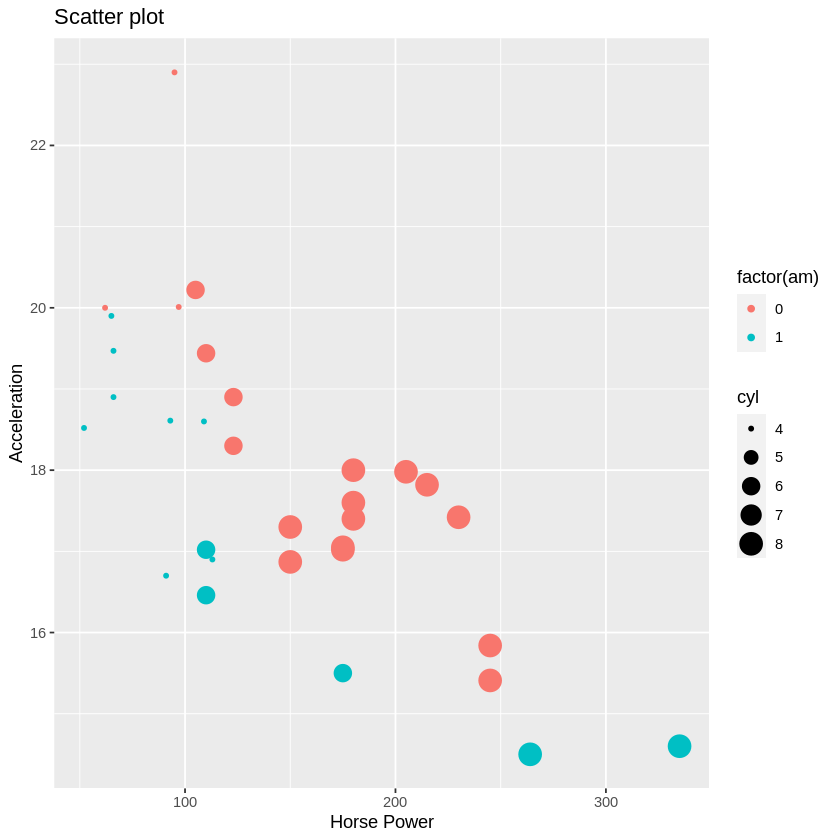

In [43]:
# We use now colour and size parameters using other features
library(ggplot2)
ggplot(data = mtcars, aes(x = hp, y = qsec, size = cyl)) +  # variables "hp" on x-axis, "qsec" on y-axis,
  geom_point(aes(col = factor(am))) +  # Color of the dot (Type of car: automatic or manual)
  ggtitle('Scatter plot') + ylab('Acceleration') + xlab('Horse Power')

The [R Graphics Cookbook](https://r-graphics.org/) by Winston Chang offers ready-to-use recipes to quickly plot with `ggplot2`.

Another popular plotting packahe is [`plotly`](https://plotly.com/r/). It is a cross-platform graphic interface that can deal with complex and interactive plotting needs. It is quite similar in spirit to `ggplot2`.

### 11.4 `shiny`

This is a propular package to create interactive webpages with `R`. The idea is to code all visual elements of a webpage that is centered around visualizing and interacting with some data that runs in `R` on the back. It is fairly simple and intuitive to use and implement, and produces outstanding results in a minimal amount of development time.

A proper introduction to `shiny` is well beyond the scope of this course, but the official tutorials are excellent to get you going:

*   https://shiny.rstudio.com/tutorial/

Have a look at the [gallery](https://shiny.rstudio.com/gallery/) to see what you can do with this and spark your creativity.


---
## 12. Notes on relevant topics

We introduce some specific topics that can be dealt with in `R`.

### 12.1 Working with time and dates

Dates are another type of object in `R`, which you can be operated on like other objects. They are of class `Date` (dates), `POSIXt` (dates and times) and `POSIXct` (dates and times with a time zone) -- you can use `is.` and `as.` operations on them.

In [44]:
# Time registered in the computed
today <- Sys.Date()  # Current time (class: Date)
now <- Sys.time()  # Current time
print(now)
class(now)

# Convert string to date and time format (look at how format is indicated!)
date1 <- strptime('2022-01-04 15:00:00', format = '%Y-%m-%d %H:%M:%S')
date2 <- strptime('2022-01-03 14:00:00', format = '%Y-%m-%d %H:%M:%S', tz = 'GMT')  # Add a time zone
date3 <- as.Date('2022-01-04', format = '%Y-%m-%d')  # If you only have date (no time)

# You can also create a POSICt object by giving all the individual data and time values to the function ISOdatatime
ISOdatetime(year = 2022, month = 01, day = 04, hour = 15, min = 0, sec = 0)

[1] "2023-06-24 15:37:20 UTC"


[1] "POSIXct" "POSIXt"

[1] "2022-01-04 15:00:00 UTC"

In [45]:
# You can also coerce to "POSIXct" like in other classes
date1 <- as.POSIXct('2022-01-04 15:00', format = '%Y-%m-%d %H:%M')
str(date1)
unclass(date1)  # it is subsettable!

 POSIXct[1:1], format: "2022-01-04 15:00:00"


[1] 1641308400
attr(,"tzone")
[1] ""

In [46]:
# Some information encoded in a time object
julian(now)  # Julian time
months(now)
quarters(now)
weekdays(now)
seq.Date(from = as.Date('2017-01-04'),
  to = as.Date('2022-01-04'),
  by = "year")  # Sequence of dates

# You can format it the way you need
format(date1, format = '%H:%M:%S')
# There is a large number of formats: type "?strptime" to discover all abbreviations

Time difference of 19532.65 days

[1] "June"

[1] "Q2"

[1] "Saturday"

[1] "2017-01-04" "2018-01-04" "2019-01-04" "2020-01-04" "2021-01-04"
[6] "2022-01-04"

[1] "15:00:00"

In [47]:
# Time difference between to time objects
difftime(date1, date2)

# In fact, you can operate with time objects as if they were numeric
date1 - date2  # Same
date1 + 1  # Units are seconds
date1 > date2

# Count days from a date
as.Date(7654, origin = "2000-01-01")

Time difference of 1.041667 days

Time difference of 1.041667 days

[1] "2022-01-04 15:00:01 UTC"

[1] TRUE

[1] "2020-12-15"

Here we have only provided basic and native ways to deal with time objects in `R`. I recommend you have a look at the `lubridate` package for more advanced programming with dates and times. A link to the *cheat sheet*:

*  https://rawgit.com/rstudio/cheatsheets/main/lubridate.pdf


### 12.2 Web scrapping and `html` parsing

This basically consists on reading web pages from `R` and processing the information that the `html` contains. There are no base methods capable of dealing adequately with this task, thus for such purpose a popular package is `rvest`.

To illustrate this, we will try to access weather forecast data for Manhattan, NY from the website of the U.S. [National Weather Service](https://forecast.weather.gov), and lay out the weather forecast we retrieve on a simple table.

In [63]:
library(rvest)  # To access and read HTML

# URL containing weather forecast in Manhattan, NY
wurl <- 'https://forecast.weather.gov/MapClick.php?lat=40.7145&lon=-74.006#.YcSmhB3OGNY'
html <- rvest::read_html(wurl)  # Read the HTML of the webpage

In [64]:
# Parse the nodes in the HTML
nodes <- rvest::html_nodes(html, ".temp")
nodes

{xml_nodeset (9)}
[1] <p class="temp temp-high">High: 78 °F</p>
[2] <p class="temp temp-low">Low: 70 °F</p>
[3] <p class="temp temp-high">High: 81 °F</p>
[4] <p class="temp temp-low">Low: 71 °F</p>
[5] <p class="temp temp-high">High: 79 °F</p>
[6] <p class="temp temp-low">Low: 70 °F</p>
[7] <p class="temp temp-high">High: 76 °F</p>
[8] <p class="temp temp-low">Low: 69 °F</p>
[9] <p class="temp temp-high">High: 77 °F</p>

In [65]:
# Extract the text from each node
node.txt <- sapply(nodes, rvest::html_text)

In [66]:
# Extract numerical values
nums <- readr::parse_number(node.txt)
n <- length(nums) - 1  # Ignore the last element
forecasts <- cbind(nums[seq(1, n, 2)], nums[seq(2, n, 2)])
forecasts

78,70
81,71
79,70
76,69


In [67]:
# Make it pretty
colnames(forecasts) <- c('High', 'low')
rownames(forecasts) <- as.character(seq.Date(
  from = as.Date('2022-01-04'),
  to = as.Date('2022-01-07'),
  by = "day"))
forecasts  # Remember you can save this object as an R Data file

,High,low
2022-01-04,78,70
2022-01-05,81,71
2022-01-06,79,70
2022-01-07,76,69


This is an extremely simple example, but there are uncountable things you can do with `html` data. I recommend you go deeper into what `rvest` can do if this is something you are interested in.

One last **disclaimer:** web scrapping on certain scales may not be allowed depending on the site, or even not completely legal under some jurisdictions, especially if you use what you gather with commercial purposes. Many sites provide what's called a [`robots.txt`](https://developers.google.com/search/docs/advanced/robots/intro) file that tells you what you are allowed to do with data you collect from their website.

**Kudos for reaching the end!**